# Customer Churn Prediction (Telecom Dataset)

Goal: Predict whether a customer will leave the company (churn) based on historical data.

Step 1: Data Loading & Initial Understanding

In [4]:
import pandas as pd

# Load the telecom churn dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Strip spaces from column names (helps avoid errors later)
df.columns = df.columns.str.strip()

# Show basic info about the dataset
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())
print("\nData types and null info:")
print(df.info())

# Show first few rows
print("\nSample data:")
print(df.head())


Shape of dataset: (7043, 21)
Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types and null info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 n

Step 2: EDA (Exploratory Data Analysis)

In [5]:
# Check the distribution of the target variable
print(df['Churn'].value_counts())
print("\nPercentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Describe numerical features
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Check unique values in categorical columns
print("\nUnique values per column:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage distribution:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary statistics for numerical columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.50

Step 3: Data Preprocessing

In [6]:
# Drop customerID column (not useful for prediction)
df = df.drop('customerID', axis=1)

# Replace 'No internet service' or 'No phone service' with 'No'
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# Convert target column Churn to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


Step 4: Feature Selection

Top correlated features with Churn:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


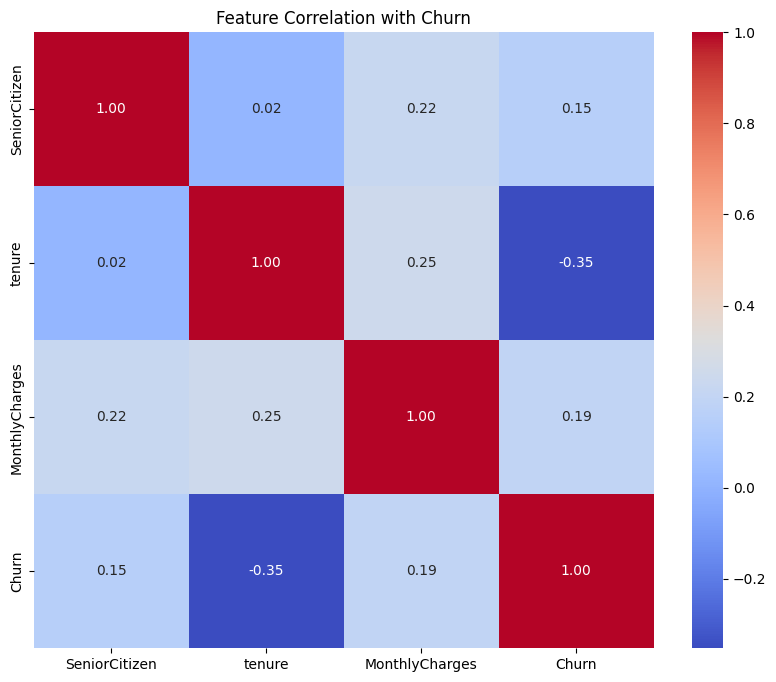

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with target
correlation = df.corr(numeric_only=True)
churn_corr = correlation['Churn'].sort_values(ascending=False)

# Display top correlated features
print("Top correlated features with Churn:")
print(churn_corr)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Churn")
plt.show()

 Step 5: Model Building

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Split into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 6: Model Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[955  81]
 [209 164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.44      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy Score: 0.794180269694819


Step 7: Insights & Visualization

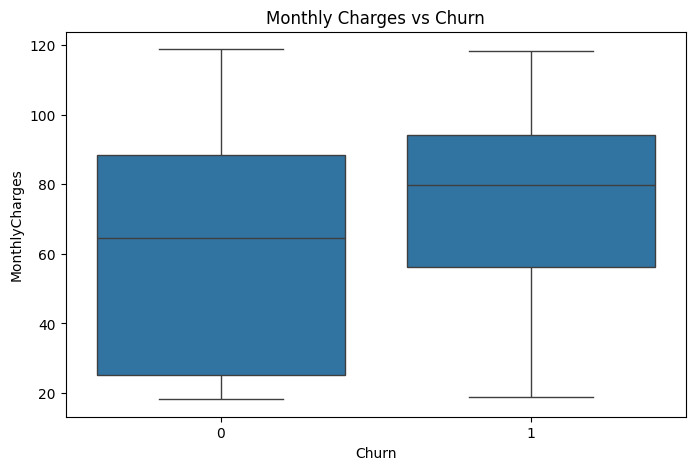

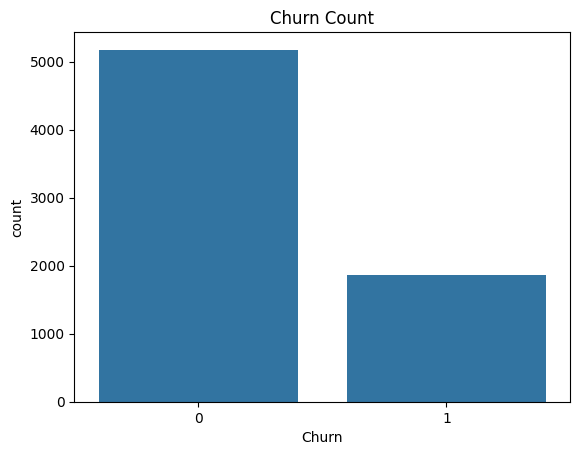

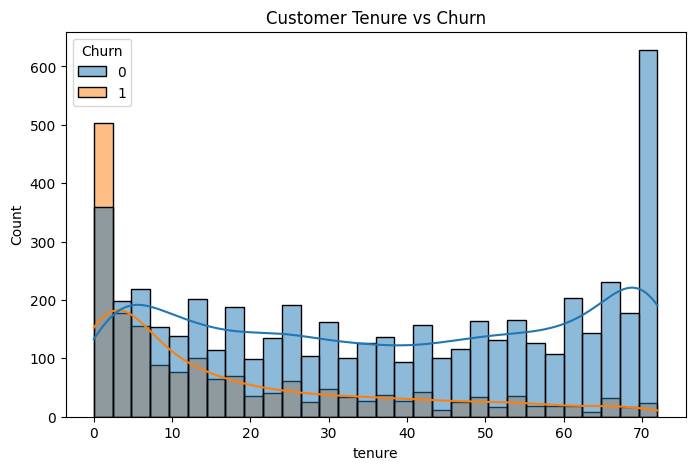

In [12]:
# Churn vs MonthlyCharges
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()
print("\n")

# Churn count plot
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()
print("\n")

# Tenure vs Churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Customer Tenure vs Churn")
plt.show()
